## Create Database (sales_data.db) + Table + Insert Data

In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price FLOAT
)
""")


data = [
    ("Laptop", 3, 60000),
    ("Laptop", 1, 60000),
    ("Mouse", 10, 500),
    ("Keyboard", 4, 1500),
    ("Monitor", 2, 12000),
    ("Mouse", 6, 500),
    ("Keyboard", 3, 1500),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()
conn.close()

print("Database created & sample data inserted successfully!")


Database created & sample data inserted successfully!


## Query SQLite Using Python

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)


Sales Summary:
    product  total_quantity   revenue
0  Keyboard               7   10500.0
1    Laptop               4  240000.0
2   Monitor               2   24000.0
3     Mouse              16    8000.0


## Plot Bar Chart of Revenue

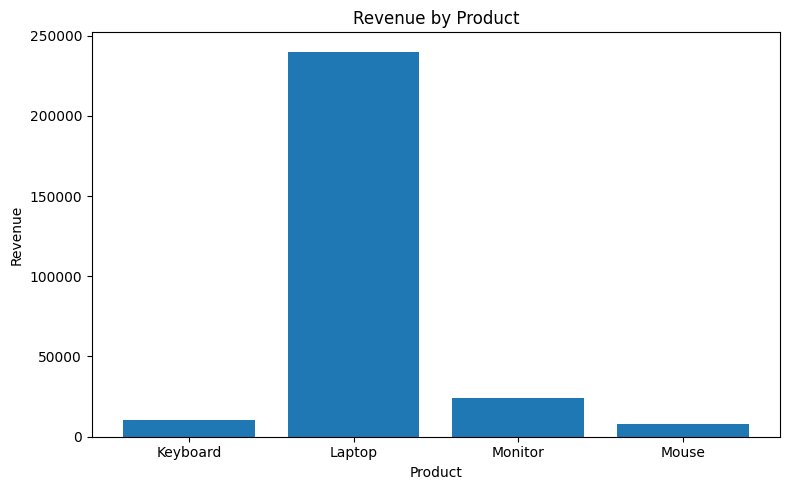

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df["product"], df["revenue"])

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()
